In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, shapiro, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.utils import rank_biserial

In [2]:
# File paths
path_interactions_6h = "../../data/copying_behaviour/nonsem_copied_6h.csv"
path_interactions_1b5h = "../../data/copying_behaviour/nonsem_copied_1b5h.csv"
path_interactions_3b3h = "../../data/copying_behaviour/nonsem_copied_3b3h.csv"


# Load the CSV files into DataFrames
df_interactions_6h = pd.read_csv(path_interactions_6h)
df_interactions_1b5h = pd.read_csv(path_interactions_1b5h)
df_interactions_3b3h = pd.read_csv(path_interactions_3b3h)

### Difference in copying behavior: 1B5H vs. 3B3H (All)

In [3]:
# Extract the 'items_copied' columns
items_copied_6h = df_interactions_6h['items_copied']
items_copied_1b5h = df_interactions_1b5h['items_copied']
items_copied_3b3h = df_interactions_3b3h['items_copied']

In [4]:
# Check normality assumption
shapiro_6h = shapiro(items_copied_6h)
shapiro_1b5h = shapiro(items_copied_1b5h)
shapiro_3b3h = shapiro(items_copied_3b3h)

print(f"P-value of Shapiro-Wilk test for 6h: {shapiro_6h[1]}")
print(f"P-value of Shapiro-Wilk test for 1b5h: {shapiro_1b5h[1]}")
print(f"P-value of Shapiro-Wilk test for 3b3h: {shapiro_3b3h[1]}")

P-value of Shapiro-Wilk test for 6h: 7.607557262088692e-23
P-value of Shapiro-Wilk test for 1b5h: 2.163566738560874e-12
P-value of Shapiro-Wilk test for 3b3h: 6.785432736114043e-09


In [5]:
# If normality is violated in either group, use Mann-Whitney U test
if shapiro_1b5h.pvalue < 0.05 or shapiro_3b3h.pvalue < 0.05 and shapiro_6h.pvalue < 0.05:
    print("Normality is violated. Apply Mann-Whitney U test.")
    mannwhitney_test_1b5h_6h = mannwhitneyu(items_copied_1b5h, items_copied_6h, alternative='greater')
    mannwhitney_test_3b3h_6h = mannwhitneyu(items_copied_3b3h, items_copied_6h, alternative='greater')
    mannwhitney_test_3b3h_1b5h = mannwhitneyu(items_copied_3b3h, items_copied_1b5h, alternative='greater')
    
    print(f"Mann-Whitney U test (1B5H vs. 6H): {mannwhitney_test_1b5h_6h}")
    print(f"Mann-Whitney U test (3B3H vs. 6H): {mannwhitney_test_3b3h_6h}")
    print(f"Mann-Whitney U test (3B3H vs. 1B5H): {mannwhitney_test_3b3h_1b5h}")

Normality is violated. Apply Mann-Whitney U test.
Mann-Whitney U test (1B5H vs. 6H): MannwhitneyuResult(statistic=np.float64(20282.0), pvalue=np.float64(0.7732891210847539))
Mann-Whitney U test (3B3H vs. 6H): MannwhitneyuResult(statistic=np.float64(23378.0), pvalue=np.float64(0.04304904589653512))
Mann-Whitney U test (3B3H vs. 1B5H): MannwhitneyuResult(statistic=np.float64(6226.0), pvalue=np.float64(0.02273225484350146))


In [6]:
# Calculate Effect Size (r) for Mann-Whitney U test
effect_size_copying_1b5h_6h = rank_biserial(items_copied_1b5h, items_copied_6h)
effect_size_copying_3b3h_6h = rank_biserial(items_copied_3b3h, items_copied_6h)
effect_size_copying_3b3h_1b5h = rank_biserial(items_copied_3b3h, items_copied_1b5h)

print(f"Effect size (r) for copying behaviour (1B5H vs. 6H): {effect_size_copying_1b5h_6h}")
print(f"Effect size (r) for copying behaviour (3B3H vs. 6H): {effect_size_copying_3b3h_6h}")
print(f"Effect size (r) for copying behaviour (3B3H vs. 1B5H): {effect_size_copying_3b3h_1b5h}")

Effect size (r) for copying behaviour (1B5H vs. 6H): -0.044023378582202066
Effect size (r) for copying behaviour (3B3H vs. 6H): 0.10190422322775272
Effect size (r) for copying behaviour (3B3H vs. 1B5H): 0.15125739644970415


### Relation: copying behavior and score

In [7]:
# Combine the two DataFrames
df_combined = pd.concat([df_interactions_6h, df_interactions_1b5h, df_interactions_3b3h])

shapiro_score = shapiro(df_combined['score'])
print(f"Shapiro-Wilk test for score: {shapiro_score}")

if shapiro_score[1] < 0.05:
    print("The score is not normally distributed. Apply Spearman correlation.")
    # Calculate Spearman correlation 
    spearman_corr, spearman_p_value = spearmanr(df_combined['items_copied'], df_combined['score'])
    print(f"Spearman correlation (score): {spearman_corr} (p-value: {spearman_p_value})")
else:
    print("The score is normally distributed. Apply Pearson correlation.")
    # Calculate Pearson correlation
    pearson_corr, pearson_p_value = pearsonr(df_combined['items_copied'], df_combined['score'])
    print(f"Pearson correlation (score): {pearson_corr} (p-value: {pearson_p_value})")

Shapiro-Wilk test for score: ShapiroResult(statistic=np.float64(0.34057320787543965), pvalue=np.float64(3.308054032511195e-42))
The score is not normally distributed. Apply Spearman correlation.
Spearman correlation (score): 0.826002200871471 (p-value: 5.226380208657885e-155)


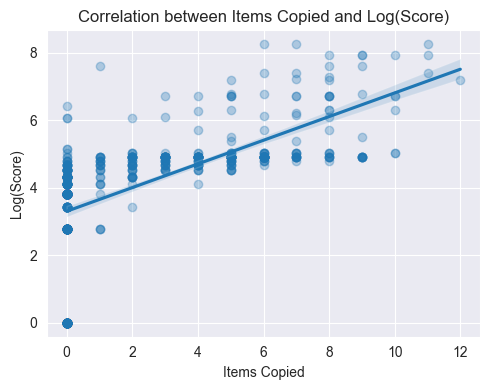

In [9]:
# Apply log transformation to the scores for improved visualization
df_combined['log_score'] = np.log1p(df_combined['score'])

# Visualize the relationship with a scatter plot and regression line (log-transformed score)
plt.figure(figsize=(5, 4))
sns.regplot(x='items_copied', y='log_score', data=df_combined, scatter_kws={'alpha':0.3})
plt.title('Correlation between Items Copied and Log(Score)')
plt.xlabel('Items Copied')
plt.ylabel('Log(Score)')
plt.tight_layout()

# Save the plot as a PDF file
output_path = "../../plots/interactions/scatter_plot_items_copied_score.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

### Relationship between copying behavior and items found


In [10]:
# Check normality
shapiro_items_found = shapiro(df_combined['total_items_found'])
print(f"Shapiro-Wilk test for total_items_found: {shapiro_items_found}")

if shapiro_items_found[1] < 0.05:
    print("The total_items_found is not normally distributed. Apply Spearman correlation.")
    # Calculate Spearman correlation on score
    spearman_corr_items, spearman_p_value_items = spearmanr(df_combined['items_copied'], df_combined['total_items_found'])
    print(f"Spearman correlation (score): {spearman_corr_items} (p-value: {spearman_p_value_items})")
else:
    print("The total_items_found is normally distributed. Apply Pearson correlation.")
    # Calculate Pearson correlation on score
    pearson_corr_items, pearson_p_value_items = pearsonr(df_combined['items_copied'], df_combined['total_items_found'])
    print(f"Pearson correlation (score): {pearson_corr_items} (p-value: {pearson_p_value_items})")

Shapiro-Wilk test for total_items_found: ShapiroResult(statistic=np.float64(0.941721512903791), pvalue=np.float64(8.147995936705466e-15))
The total_items_found is not normally distributed. Apply Spearman correlation.
Spearman correlation (score): 0.8399733353986939 (p-value: 3.692426217034723e-165)


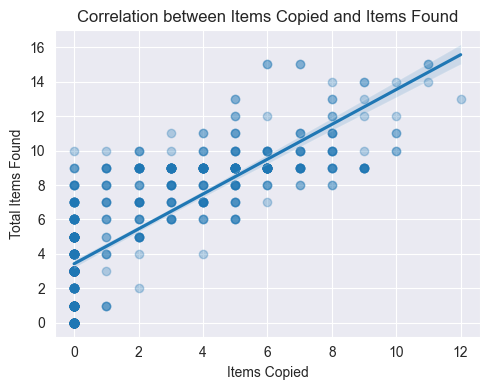

In [11]:
# Visualize the relationship with a scatter plot and regression line
plt.figure(figsize=(5, 4))
sns.regplot(x='items_copied', y='total_items_found', data=df_combined, scatter_kws={'alpha':0.3})
plt.title('Correlation between Items Copied and Items Found')
plt.xlabel('Items Copied')
plt.ylabel('Total Items Found')
plt.tight_layout()

# Save the plot as a PDF file
output_path = "../../plots/interactions/scatter_plot_items_copied_total_items_found.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()